# Data preparation

imports

In [1]:
import glob
import os
from pathlib import Path
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import cv2 
import warnings
import tensorflow as tf 

In [2]:
warnings.filterwarnings('ignore')

pandas setting 

In [52]:
pd.set_option('display.max_columns', None)  # Show all columns
pd.set_option('display.width', None)  # Set the display width to fit all columns
pd.set_option('display.max_colwidth', None)  # Display full width of text

check gpu 

In [12]:
gpus = tf.config.list_physical_devices('GPU')
if gpus:
    for gpu in gpus:
        print(gpu.name)
        tf.config.experimental.set_memory_growth(gpu, True)
else:
    print("No gpu devices found")

/physical_device:GPU:0
/physical_device:GPU:1


a function for getting paths of fake videos

In [4]:
def get_fake_paths(main_directory):
    data = []

    for subdir in Path(main_directory).rglob('*/*'):
        if subdir.is_dir():
            person_name = subdir.parts[-2] 
            image_files = list(subdir.glob('*.jpg')) 
            for image_file in image_files:
                data.append({'Image_Path': str(image_file), 'Person_Name': person_name})

    df = pd.DataFrame(data)
    df['Person_Label'] = pd.factorize(df['Person_Name'])[0]

    return df

* high quality image paths are saved in **high_df** dataframe
* low quality videos paths are saved in **low_df** dataframe

In [5]:
high_directory = "/kaggle/input/d/mahdierahmati/deepfaketimit/DeepfakeTIMIT/higher_quality"
low_directory = "/kaggle/input/d/mahdierahmati/deepfaketimit/DeepfakeTIMIT/lower_quality"

high_df = get_fake_paths(high_directory)
low_df = get_fake_paths(low_directory)

check fake addresses 

In [6]:
print(high_df.shape)
print(low_df.shape)

(34023, 3)
(34023, 3)


In [7]:
high_df.head()

,Image_Path,Person_Name,Person_Label
0,/kaggle/input/d/mahdierahmati/deepfaketimit/De...,mrjo0,0
1,/kaggle/input/d/mahdierahmati/deepfaketimit/De...,mrjo0,0
2,/kaggle/input/d/mahdierahmati/deepfaketimit/De...,mrjo0,0
3,/kaggle/input/d/mahdierahmati/deepfaketimit/De...,mrjo0,0
4,/kaggle/input/d/mahdierahmati/deepfaketimit/De...,mrjo0,0


In [32]:
low_df.tail()

,Image_Path,Person_Name,Person_Label
34018,/kaggle/input/d/mahdierahmati/deepfaketimit/DeepfakeTIMIT/lower_quality/fjem0/sx94/053.jpg,fjem0,31
34019,/kaggle/input/d/mahdierahmati/deepfaketimit/DeepfakeTIMIT/lower_quality/fjem0/sx94/013.jpg,fjem0,31
34020,/kaggle/input/d/mahdierahmati/deepfaketimit/DeepfakeTIMIT/lower_quality/fjem0/sx94/016.jpg,fjem0,31
34021,/kaggle/input/d/mahdierahmati/deepfaketimit/DeepfakeTIMIT/lower_quality/fjem0/sx94/044.jpg,fjem0,31
34022,/kaggle/input/d/mahdierahmati/deepfaketimit/DeepfakeTIMIT/lower_quality/fjem0/sx94/040.jpg,fjem0,31


utility function for showing images 

In [41]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

def show_image(image_path):

    img = mpimg.imread(image_path)
    plt.imshow(img)
    plt.axis('off') 
    plt.show()

show one of low quality fake images

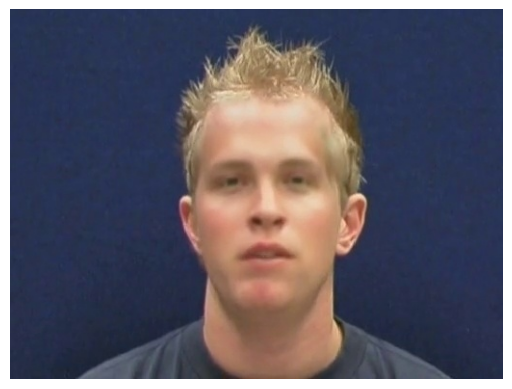

In [34]:
show_image(low_df["Image_Path"][0])

show one of high quality fake images

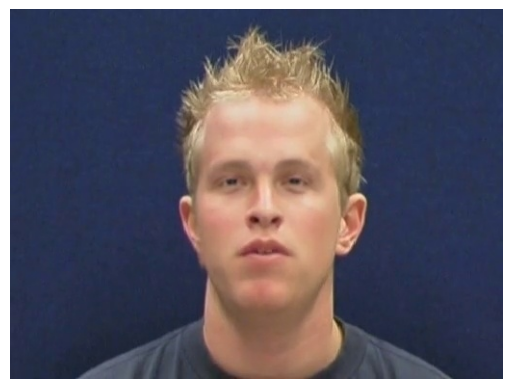

In [35]:
show_image(high_df["Image_Path"][0])

a function for getting paths of real videos

In [8]:
from pathlib import Path
import pandas as pd

def get_real_paths(main_directory):
    data = []
    excluded_persons = ['fcmr0', 'fdms0', 'mabw0', 'fpkt0', 'fgjd0', 'mtas1', 'mtmr0', 'mbjk0', 'mbdg0', 'fcrh0', 'mreb0']
    excluded_videos = ["head", "head2", "head3"]

    for subdir in Path(main_directory).rglob('*/*/video/*'):
        if subdir.is_dir() and subdir.parts[-3] not in excluded_persons and subdir.parts[-1] not in excluded_videos:
            person_name = subdir.parts[-3]  
            image_files = list(subdir.glob('*')) 
            for image_file in image_files:
                data.append({'Image_Path': str(image_file), 'Person_Name': person_name})

    df = pd.DataFrame(data)
    df['Person_Label'] = pd.factorize(df['Person_Name'])[0] + 32

    return df

real videos paths are saved in **real_df** dataframe

In [9]:
real_directory = "/kaggle/input/vidtimit-audiovideo-dataset"
real_df = get_real_paths(real_directory)

check real addresses

In [10]:
real_df.shape

(34003, 3)

In [11]:
real_df.head()

,Image_Path,Person_Name,Person_Label
0,/kaggle/input/vidtimit-audiovideo-dataset/mrjo...,mrjo0,32
1,/kaggle/input/vidtimit-audiovideo-dataset/mrjo...,mrjo0,32
2,/kaggle/input/vidtimit-audiovideo-dataset/mrjo...,mrjo0,32
3,/kaggle/input/vidtimit-audiovideo-dataset/mrjo...,mrjo0,32
4,/kaggle/input/vidtimit-audiovideo-dataset/mrjo...,mrjo0,32


show one of real images

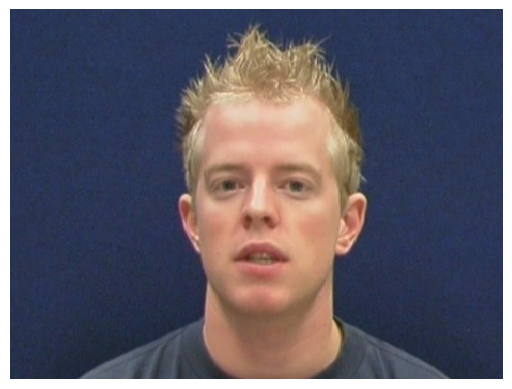

In [40]:
show_image(real_df["Image_Path"][0])

labeling the images
- fake -> 1
- real -> 0 

In [12]:
high_df["Label"] = 1 
low_df["Label"] = 1 
real_df["Label"] = 0

In [42]:
high_df.head() 

,Image_Path,Person_Name,Person_Label,Label
0,/kaggle/input/d/mahdierahmati/deepfaketimit/DeepfakeTIMIT/higher_quality/mrjo0/sx14/029.jpg,mrjo0,0,1
1,/kaggle/input/d/mahdierahmati/deepfaketimit/DeepfakeTIMIT/higher_quality/mrjo0/sx14/014.jpg,mrjo0,0,1
2,/kaggle/input/d/mahdierahmati/deepfaketimit/DeepfakeTIMIT/higher_quality/mrjo0/sx14/109.jpg,mrjo0,0,1
3,/kaggle/input/d/mahdierahmati/deepfaketimit/DeepfakeTIMIT/higher_quality/mrjo0/sx14/034.jpg,mrjo0,0,1
4,/kaggle/input/d/mahdierahmati/deepfaketimit/DeepfakeTIMIT/higher_quality/mrjo0/sx14/024.jpg,mrjo0,0,1


install dlib

In [43]:
!pip install dlib
import dlib 

  Using cached dlib-19.24.2.tar.gz (11.8 MB)
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
  Created wheel for dlib: filename=dlib-19.24.2-cp310-cp310-linux_x86_64.whl size=3301372 sha256=5dab43976156f8775f63df8b2e7184f38b960a6bfdb0649b3c42b6cb4a25aafd
  Stored in directory: /root/.cache/pip/wheels/9b/e2/80/888fdc098db86b463ff0c83ae5e5ca151889e901bc1e9a3a11
Successfully built dlib


function for detecting face and saving coordinates in a dataframe 

In [44]:
def detect_faces_and_save_coordinates(df, detector):
    for index, row in df.iterrows():
        image_path = row['Image_Path']
        frame = cv2.imread(image_path)
        face_rects, _, _ = detector.run(frame, 0)
        if not face_rects:
            print("No face detected in:", image_path)
            df.at[index, 'x1'] = None
            df.at[index, 'x2'] = None
            df.at[index, 'y1'] = None
            df.at[index, 'y2'] = None
        else:
            x1, y1, x2, y2 = face_rects[0].left(), face_rects[0].top(), face_rects[0].right(), face_rects[0].bottom()
            df.at[index, 'x1'] = x1
            df.at[index, 'x2'] = x2
            df.at[index, 'y1'] = y1
            df.at[index, 'y2'] = y2
    return df

detect high fake faces

In [45]:
detector = dlib.get_frontal_face_detector()
high_df_with_coordinates = detect_faces_and_save_coordinates(high_df, detector)

No face detected in: /kaggle/input/d/mahdierahmati/deepfaketimit/DeepfakeTIMIT/higher_quality/mrgg0/si569/069.jpg
No face detected in: /kaggle/input/d/mahdierahmati/deepfaketimit/DeepfakeTIMIT/higher_quality/mgwt0/si1539/055.jpg
No face detected in: /kaggle/input/d/mahdierahmati/deepfaketimit/DeepfakeTIMIT/higher_quality/mgwt0/sx189/006.jpg
No face detected in: /kaggle/input/d/mahdierahmati/deepfaketimit/DeepfakeTIMIT/higher_quality/fcft0/sx188/026.jpg
No face detected in: /kaggle/input/d/mahdierahmati/deepfaketimit/DeepfakeTIMIT/higher_quality/mjsw0/sx290/079.jpg
No face detected in: /kaggle/input/d/mahdierahmati/deepfaketimit/DeepfakeTIMIT/higher_quality/felc0/sx216/007.jpg
No face detected in: /kaggle/input/d/mahdierahmati/deepfaketimit/DeepfakeTIMIT/higher_quality/felc0/sx216/003.jpg
No face detected in: /kaggle/input/d/mahdierahmati/deepfaketimit/DeepfakeTIMIT/higher_quality/felc0/sx216/020.jpg
No face detected in: /kaggle/input/d/mahdierahmati/deepfaketimit/DeepfakeTIMIT/higher_q

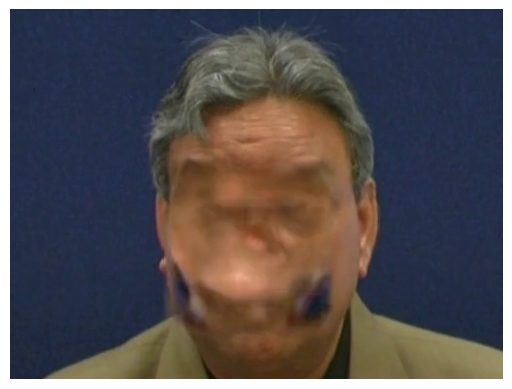

In [4]:
show_image("/kaggle/input/d/mahdierahmati/deepfaketimit/DeepfakeTIMIT/higher_quality/mrgg0/si569/069.jpg")

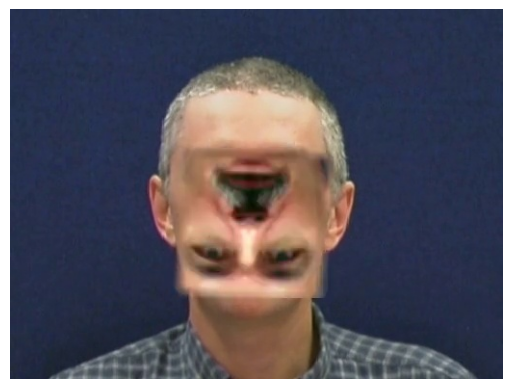

In [5]:
show_image("/kaggle/input/d/mahdierahmati/deepfaketimit/DeepfakeTIMIT/higher_quality/mgwt0/si1539/055.jpg")

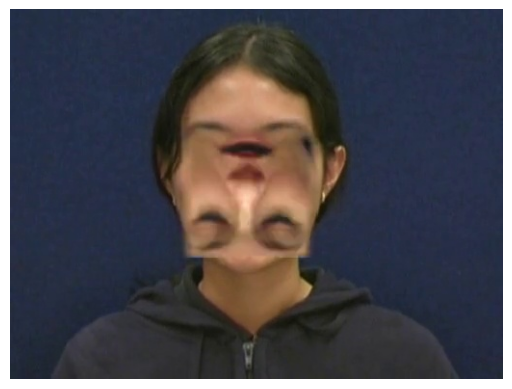

In [42]:
show_image("/kaggle/input/d/mahdierahmati/deepfaketimit/DeepfakeTIMIT/higher_quality/fcft0/sx188/026.jpg")

detect low fake faces

In [46]:
low_df_with_coordinates = detect_faces_and_save_coordinates(low_df, detector)

detect real faces

In [51]:
real_df_with_coordinates = detect_faces_and_save_coordinates(real_df, detector)

info

In [64]:
real_df_with_coordinates.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 34003 entries, 0 to 34002
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Image_Path    34003 non-null  object 
 1   Person_Name   34003 non-null  object 
 2   Person_Label  34003 non-null  int64  
 3   Label         34003 non-null  int64  
 4   x1            34003 non-null  float64
 5   x2            34003 non-null  float64
 6   y1            34003 non-null  float64
 7   y2            34003 non-null  float64
dtypes: float64(4), int64(2), object(2)
memory usage: 2.1+ MB


convert float to int 

In [66]:
real_df_with_coordinates[['x1', 'x2', 'y1', 'y2']] = real_df_with_coordinates[['x1', 'x2', 'y1', 'y2']].astype(int)
high_df_with_coordinates[['x1', 'x2', 'y1', 'y2']] = high_df_with_coordinates[['x1', 'x2', 'y1', 'y2']].fillna(-1)
high_df_with_coordinates[['x1', 'x2', 'y1', 'y2']] = high_df_with_coordinates[['x1', 'x2', 'y1', 'y2']].astype(int)
low_df_with_coordinates[['x1', 'x2', 'y1', 'y2']] = low_df_with_coordinates[['x1', 'x2', 'y1', 'y2']].astype(int)

save dataframes

In [67]:
high_df_with_coordinates.to_csv('/kaggle/working/high.csv', index=False)
low_df_with_coordinates.to_csv('/kaggle/working/low.csv', index=False)
real_df_with_coordinates.to_csv('/kaggle/working/real.csv', index=False)

show faces

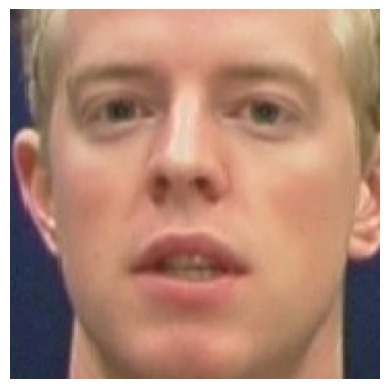

In [70]:
img = cv2.imread(real_df_with_coordinates["Image_Path"][0])
y1 = real_df_with_coordinates["y1"][0]
y2 = real_df_with_coordinates["y2"][0]
x1= real_df_with_coordinates["x1"][0]
x2 = real_df_with_coordinates["x2"][0]
face = img[y1:y2,x1:x2]
plt.imshow(face[:,:,::-1])
plt.axis('off') 
plt.show()

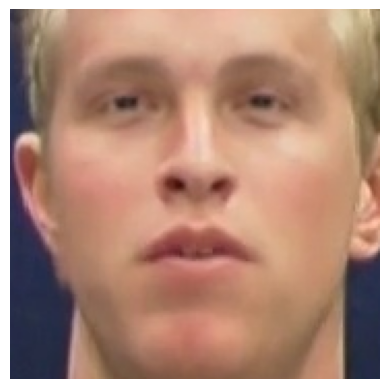

In [71]:
img = cv2.imread(high_df_with_coordinates["Image_Path"][0])
y1 = high_df_with_coordinates["y1"][0]
y2 = high_df_with_coordinates["y2"][0]
x1= high_df_with_coordinates["x1"][0]
x2 = high_df_with_coordinates["x2"][0]
face = img[y1:y2,x1:x2]
plt.imshow(face[:,:,::-1])
plt.axis('off') 
plt.show()

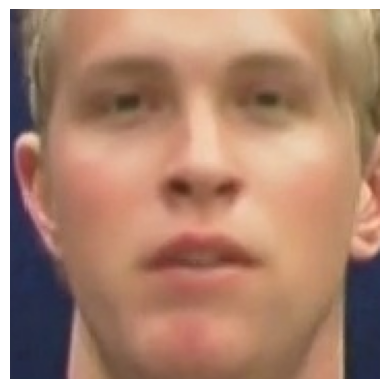

In [72]:
img = cv2.imread(low_df_with_coordinates["Image_Path"][0])
y1 = low_df_with_coordinates["y1"][0]
y2 = low_df_with_coordinates["y2"][0]
x1= low_df_with_coordinates["x1"][0]
x2 = low_df_with_coordinates["x2"][0]
face = img[y1:y2,x1:x2]
plt.imshow(face[:,:,::-1])
plt.axis('off') 
plt.show()

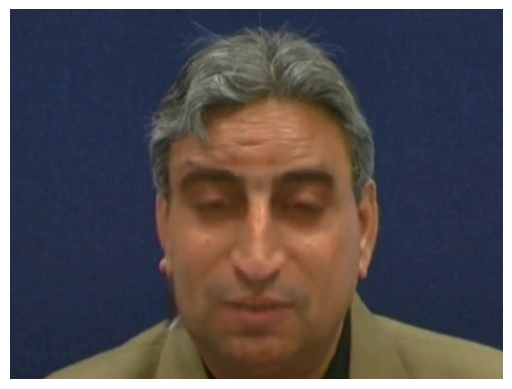

In [44]:
img = mpimg.imread("/kaggle/input/d/mahdierahmati/deepfaketimit/DeepfakeTIMIT/higher_quality/mrgg0/si569/068.jpg")
plt.imshow(img)
plt.axis('off') 
plt.show()

In [46]:
img.shape

(384, 512, 3)

In [48]:
df_high = pd.read_csv("/kaggle/input/high-quality/high.csv")

In [49]:
df_high[df_high["x1"]>512]

,Image_Path,Person_Name,Person_Label,Label,x1,x2,y1,y2


In [50]:
df_high[df_high["x2"]>512]

,Image_Path,Person_Name,Person_Label,Label,x1,x2,y1,y2


In [53]:
df_high[df_high["y2"]>384]

,Image_Path,Person_Name,Person_Label,Label,x1,x2,y1,y2
1180,/kaggle/input/d/mahdierahmati/deepfaketimit/DeepfakeTIMIT/higher_quality/mrgg0/sx119/109.jpg,mrgg0,1,1,136,394,136,394
1192,/kaggle/input/d/mahdierahmati/deepfaketimit/DeepfakeTIMIT/higher_quality/mrgg0/sx119/106.jpg,mrgg0,1,1,136,394,136,394
1193,/kaggle/input/d/mahdierahmati/deepfaketimit/DeepfakeTIMIT/higher_quality/mrgg0/sx119/113.jpg,mrgg0,1,1,136,394,136,394
1206,/kaggle/input/d/mahdierahmati/deepfaketimit/DeepfakeTIMIT/higher_quality/mrgg0/sx119/112.jpg,mrgg0,1,1,136,394,136,394
1207,/kaggle/input/d/mahdierahmati/deepfaketimit/DeepfakeTIMIT/higher_quality/mrgg0/sx119/056.jpg,mrgg0,1,1,136,394,136,394
1208,/kaggle/input/d/mahdierahmati/deepfaketimit/DeepfakeTIMIT/higher_quality/mrgg0/sx119/101.jpg,mrgg0,1,1,136,394,136,394
1223,/kaggle/input/d/mahdierahmati/deepfaketimit/DeepfakeTIMIT/higher_quality/mrgg0/sx119/105.jpg,mrgg0,1,1,136,394,136,394
1226,/kaggle/input/d/mahdierahmati/deepfaketimit/DeepfakeTIMIT/higher_quality/mrgg0/sx119/111.jpg,mrgg0,1,1,136,394,136,394
1234,/kaggle/input/d/mahdierahmati/deepfaketimit/DeepfakeTIMIT/higher_quality/mrgg0/sx119/103.jpg,mrgg0,1,1,136,394,136,394
1239,/kaggle/input/d/mahdierahmati/deepfaketimit/DeepfakeTIMIT/higher_quality/mrgg0/sx119/104.jpg,mrgg0,1,1,136,394,136,394


In [54]:
df_high.loc[df_high["y2"] > 384, "y2"] = 384

In [56]:
df_high.to_csv('/kaggle/working/high_new.csv', index=False)